<a id='start'></a>
# Lezione 1 - Esercizi

#### Utilizziamo ed esploariamo un dataset di Pandas.

Provate a svolgere i seguenti esercizi: <br>
1) [Plottare grafici per età di uomini e donne](#section1)<a href='#section1'></a> <br>
2) [Rappresentare i morti/sopravvissuti per ogni classe](#section2)<a href='#section2'></a><br>
3) [Fitting di un istogramma](#section4)<a href='#section4'></a> <br>
4) [Correzione tra prezzo biglietto ed età?](#section5)<a href='#section5'></a> <br>
5) [Statistica descrittiva](#section7)<a href='#section7'></a>
6) [Getti di particelle](#section8)<a href='#section8'></a>
7) [PCA e Isomap](#section9)<a href='#section9'></a>

Importiamo il dataset del Titanic

In [1]:
import pandas as pd

titanic = pd.read_csv("data/train_dataset_titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='section1'></a>
## Plottare grafici per età di uomini e donne

Effettuare dei calcoli sulle età degli uomini e delle donne.<br>
Per risolvere l'esercizio:
1. Calcolare le principali statistiche delle serie delle età delle donne e degli uomini
2. Rappresentare le età degli uomini e delle donne su due distinti istrogrammi, per ognuno dei due istogrammi provare a fittare i dati con una fistribuzione normale e disegnare la funzione di fit calcolata.

In [2]:
donne = titanic.loc[titanic.Sex == "female"]
media_donne = donne.Age.mean()
std_donne = donne.Age.std()
print("L'età media delle donne era di: %d anni e la deviazione standard %.2f." % (media_donne, std_donne))

uomini = titanic.loc[titanic.Sex == "male"]
media_uomini = uomini.Age.mean()
std_uomini = uomini.Age.std()
print("L'età media degli uomini era di: %d anni e la deviazione standard %.2f." % (media_uomini, std_uomini))

L'età media delle donne era di: 27 anni e la deviazione standard 14.11.
L'età media degli uomini era di: 30 anni e la deviazione standard 14.68.


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
donne.Age.describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [6]:
uomini.Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
from scipy.stats import norm
help(norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



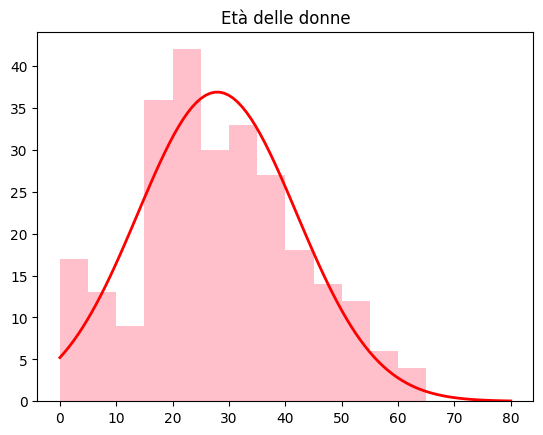

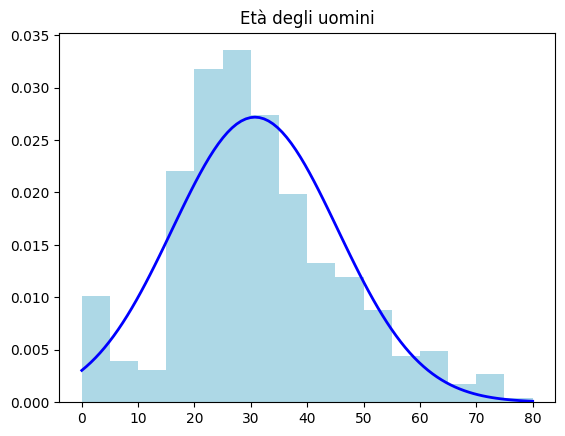

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

max_bin = 80
num_bin = 16
xmin, xmax = 0, max_bin

# Creiamo l'istogramma per le donne non normalizzato
plt.hist(donne.Age, bins=num_bin, range=[xmin, xmax], color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
# La funzione gaussiana va moltiplicata per una costante che è 
# l'integrale dell'istogramma (ovvero base per altezza di ogni bin)
p *= donne.Age.count() * max_bin/num_bin
plt.plot(x, p, color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

# Cresiamo l'istogramma per gli uomini normalizzando i dati
plt.hist(uomini.Age, bins=num_bin, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, color="blue", linewidth=2)
plt.title("Età degli uomini")
plt.show()

Gli errori che si vedono derivano dal fatto che alcuni passeggeri hanno NaN come valore per l'età e quindi la libreria pyplot non sa come disegnare quel valore nell'istogramma.

In [9]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
u = uomini[uomini.Age.notnull()]
d = donne[donne.Age.notnull()]

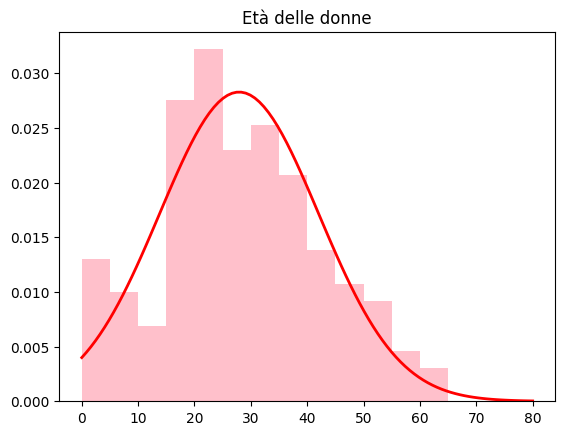

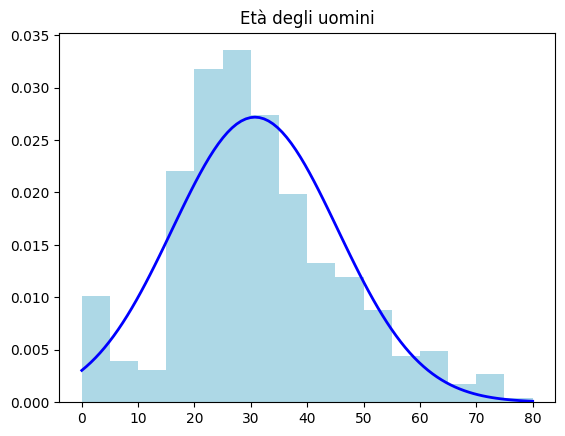

In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

max_bin = 80
num_bin = 16
xmin, xmax = 0, max_bin

plt.hist(d.Age, bins=num_bin, range=[xmin, xmax], density=True, color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
plt.plot(x, p, color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

plt.hist(u.Age, bins=num_bin, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, color="blue", linewidth=2)
plt.title("Età degli uomini")
plt.show()

<a id='section2'></a>
## Rappresentare i morti/sopravvissuti per ogni classe

Rappresentare in un grafico a pila il numero di morti e sopravvissuti per ogni classe di servizio del viaggio (prima classe, seconda classe, terza classe).

In [12]:
byclass = titanic.groupby(['Pclass', 'Survived'])['PassengerId'].aggregate(['count'])
byclass

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

Abbiamo ottenuto il risultato che ci interessava, ma i dati hanno due indici (PClass e Survived) e un solo valore.

Utilizzando il metodo unstack possiamo far diventare l'indice Survived una nuova dimensione in modo da avere una matrice:

In [13]:
chart_data = byclass.unstack()
chart_data = chart_data.rename_axis('classe')
chart_data

count     
Survived     0    1
classe             
1           80  136
2           97   87
3          372  119

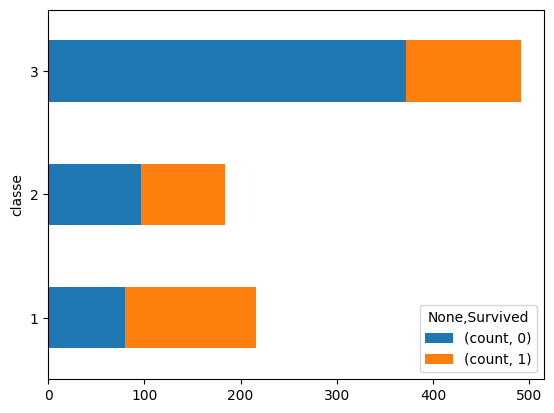

In [14]:
ax = chart_data.plot.barh(stacked=True)
plt.show()

<a id='section4'></a>
## Fitting di un istogramma 

Scaricate il file `data1.txt` e realizzate un programma che legga e fitti i dati in esso contenuti. Il fitting potrà essere effettuato con una funzione gaussiana. Quindi fittate i dati e mostrate i risultati del fitting. 

Fare lo stesso con i dati nel file `data2.txt`.
In questo caso il fitting dovrà avvenire con una funzione risultato della composizione di più funzioni (una per il background e una per i segnali).

Il chi quando calcolato è: 0.27320682752327613.


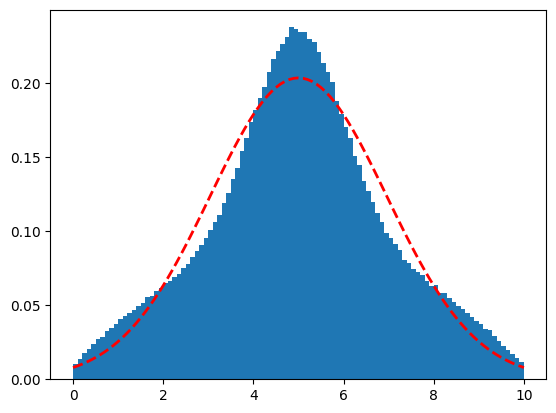

In [15]:
from scipy.stats import norm
import matplotlib.pyplot as plt

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

# let's compute chi-square
chi = sum([((b - a)**2)/a for a, b in zip(n, y)])
print(f'Il chi quando calcolato è: {chi}.')

Proviamo a costruire il fit "a mano" partendo da una definzione di una funzione di fit e usando il metodo `curve_fit` (ci verrà comodo per l'altra parte dell'esercizio!).

Il chi quando calcolato è: 0.3224594850047411.


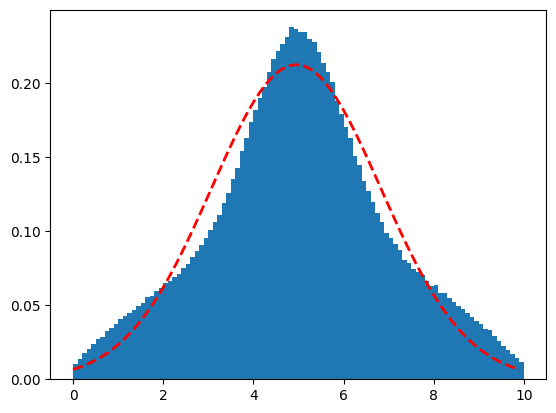

In [16]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

def fit_fuct(x, mean, std):
    f = norm(mean, std)
    return f.pdf(x)

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

bin_starts = [b for b in bins[:-1]]

popt, _ = curve_fit(fit_fuct, bin_starts, n)
y = [fit_fuct(b, *popt) for b in bin_starts]

# add a 'best fit' line
l = plt.plot(bin_starts, y, 'r--', linewidth=2)

# let's compute chi-square
chi = sum([((b - a)**2)/a for a, b in zip(n, y)])
print(f'Il chi quando calcolato è: {chi}.')

Così facendo ci è anche possibile creare una funzione di fit sull'istogramma non normalizzato (aggiungendo un fattore di scala K alla funzione della gaussiana).

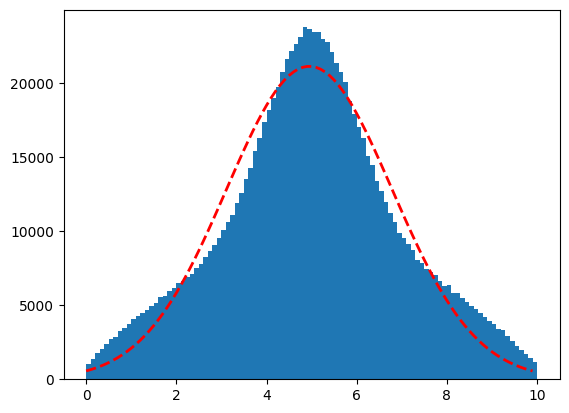

In [17]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

def fit_fuct(x, mean, std, k):
    f = norm(mean, std)
    return k * f.pdf(x)

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100)

bin_starts = [b for b in bins[:-1]]

popt, _ = curve_fit(fit_fuct, bin_starts, n)
y = [fit_fuct(b, *popt) for b in bin_starts]

# add a 'best fit' line
l = plt.plot(bin_starts, y, 'r--', linewidth=2)

Proviamo ora a fittare i dati nel scondo file, usando una funziona di fit che è la composizione di background e segnali.

/tmp/ipykernel_91/461616780.py:10: RuntimeWarning: overflow encountered in exp
  b = intercept * np.exp(-x/exp)


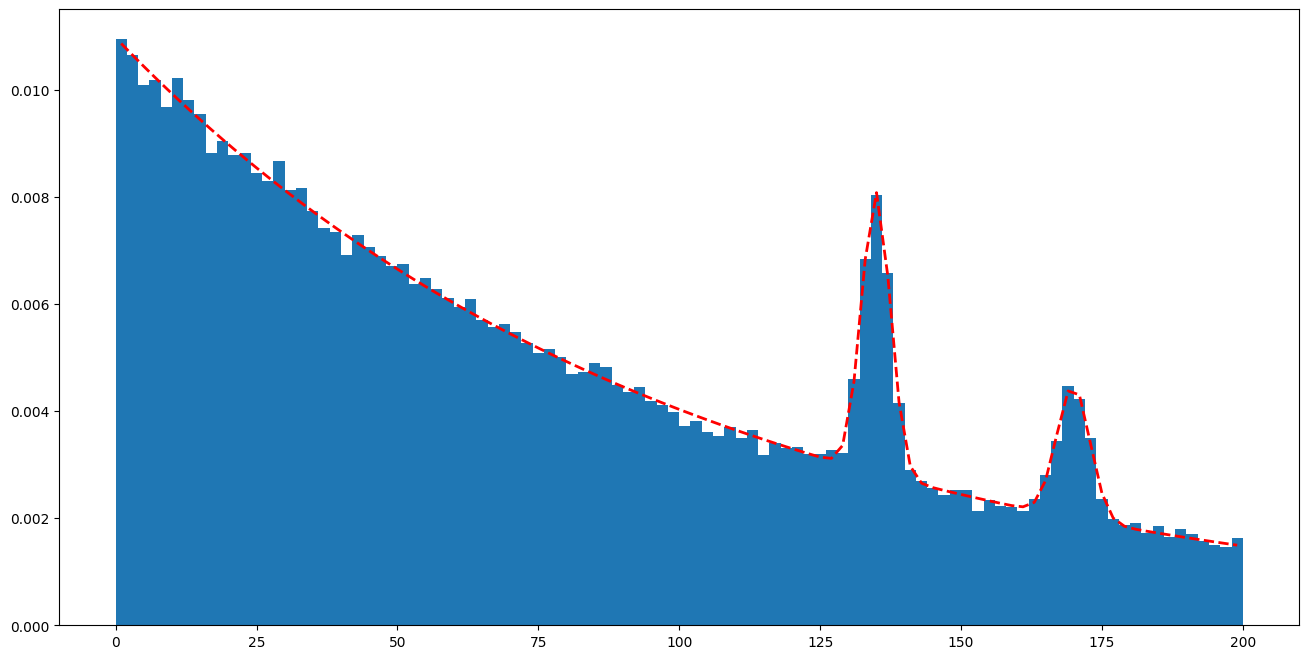

In [18]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

def fit_fuct(x, intercept, exp, k1, mean1, std1, k2, mean2, std2):
    # exponential background
    b = intercept * np.exp(-x/exp)
    
    # first signal
    f1 = norm(mean1, std1)
    
    # second signal
    f2 = norm(mean2, std2)

    return b + k1 * f1.pdf(x) + k2 * f2.pdf(x)

data = pd.read_csv('data/data2.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

bin_centers = [bins[i] + (bins[i+1] - bins[i])/2 for i in range(len(bins)-1)]

#let's help the fit, all initial parameters default to 1 unless differently specified here
initial_params = [1, 1, 1, 130, 1, 1, 170, 1]
popt, _ = curve_fit(fit_fuct, bin_centers, n, initial_params)
y = [fit_fuct(b, *popt) for b in bin_centers]

# add a 'best fit' line
l = plt.plot(bin_centers, y, 'r--', linewidth=2)

<a id='section5'></a>
## Correlazione tra prezzo biglietto ed età? 

Verificare se esiste una correlazione tra l'età del passeggero e il prezzo pagato per il biglietto. <br>
La correlezione può essere vista ad occhio facendo un grafico scatter o calcolata con un indice di correlazione.

<Axes: xlabel='Age', ylabel='Fare'>

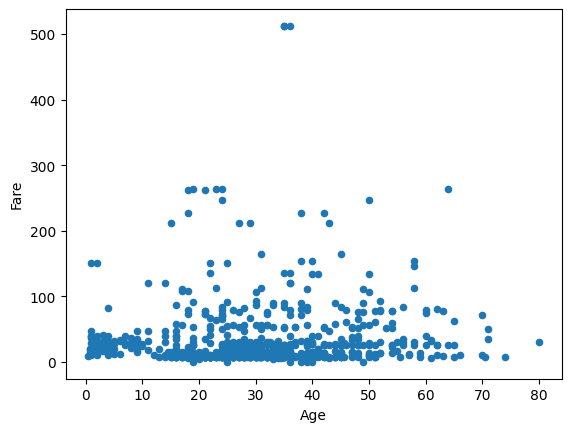

In [19]:
titanic.plot.scatter(x='Age', y='Fare')

In [20]:
titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


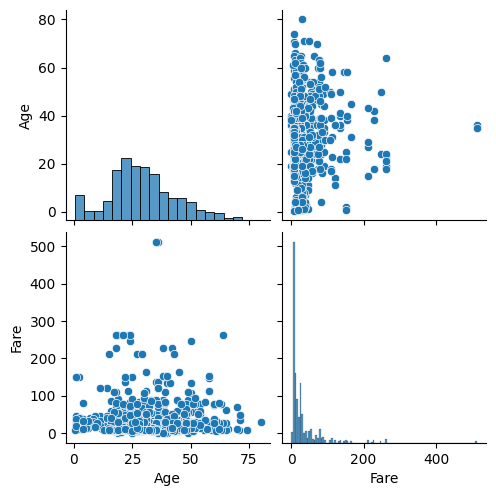

In [21]:
import seaborn as sns

ax = sns.pairplot(titanic[['Age', 'Fare']])
plt.show()

<a id='section7'></a>
## Statistica descrittiva

Calcola le misure di tedenza e viaribility del seguente dataset <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston' > riguardante i prezzi delle case di Boston</a>:

In [22]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
dataset_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

print("Dataset's dimension:", dataset_boston.shape)

Dataset's dimension: (506, 13)


In [23]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ] 

df_boston = pd.DataFrame(dataset_boston, columns=feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [25]:
from scipy import stats

# Mean of CRIM feature
mean = df_boston.CRIM.mean()
print(f"Mean of INDUS: {mean}")

# Median of INDUS feature
median = df_boston.INDUS.mean()
print(f"Median of INDUS: {median}")

# Trimmed Mean excluding 20% of first and last data of INDUS feature
# (you can try to define a trimmed function)
INDUS_sort = df_boston.INDUS.sort_values()
INDUS_sort = INDUS_sort.reset_index(drop = True)

limit = 0.2
limits = (INDUS_sort[round(df_boston.INDUS.shape[0]*limit)], INDUS_sort[round(df_boston.INDUS.shape[0]*(1-limit))])

trimmed_mean = stats.tmean(INDUS_sort, limits=limits)

print("INDUS trimmed mean:", round(trimmed_mean,2), "with the following limits:", limits)

# Variance LSTAT
variance = df_boston.LSTAT.var()
print("LSTAT's variance:", round(variance,2))
print("-----------------------------")

# Standard Deviation LSTAT
st_dev = df_boston.LSTAT.std()
print("LSTAT's standard deviation:", round(st_dev,2))
print("-----------------------------")

# Median absolute deviation from median
mean_absolute_deviation = df_boston.LSTAT.mad()
print("LSTAT's mean absolute deviation:", round(mean_absolute_deviation, 2))
print("-----------------------------")



Mean of INDUS: 3.613523557312254
Median of INDUS: 11.13677865612648
INDUS trimmed mean: 11.83 with the following limits: (4.39, 18.1)
LSTAT's variance: 50.99
-----------------------------
LSTAT's standard deviation: 7.14
-----------------------------
LSTAT's mean absolute deviation: 5.72
-----------------------------


/tmp/ipykernel_91/381122535.py:34: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean_absolute_deviation = df_boston.LSTAT.mad()


<a id='section8'></a>
## Getti di particelle

Esploriamo il file `jetImage.h5`. Il file è costituito da un insieme di getti, provenienti da diversi tipi di particelle
- quark leggeri
- gluoni
- Bosoni W che decadono a due quark leggeri
- Bosoni Z che decadono a due quark leggeri
- quark top che decadono a tre quark light (tramite decadimenti W+b)

Per ogni getto memorizziamo le informazioni della doccia che genera, in diversi formati:
- un elenco dei suoi componenti (fino a 188). Ogni costituente è rappresentato da una matrice di 16 quantità (ad esempio, energia e direzione delle particelle, assolute e relative all'asse del getto)
- un elenco di caratteristiche che quantificano la cinematica del getto (energia e direzione) e la forma collettiva dei suoi costituenti (caratteristiche che quantificano quanti rebbi contiene il jetc)
- l'immagine del getto, ovvero la mappa di temperatura del flusso di energia (tecnicamente, il momento trasverso) in funzione della distanza angolare dall'asse del getto

Importiamo i dati, osserviamoli e facciamo un primo grafico di distribuzione di probabilità:

In [26]:
import h5py

f = h5py.File("data/jetImage.h5")
print(list(f.keys()))

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


I diversi set di dati corrispondono a:
- **jetConstituentList**: elenco delle caratteristiche dei componenti del jet
- **jetImage**: immagine del flusso di momento trasverso del getto
- **jetImage**: immagine del flusso di momento trasverso del getto per elettroni e fotoni
- **jetImage**: immagine del flusso di momento trasverso del getto per gli adroni
- **jets**: elenco delle caratteristiche dei getti

In [27]:
particleFeatureNames = f.get("particleFeatureNames")
print(particleFeatureNames.shape)
###
jetConstituentList = f.get("jetConstituentList")
print(jetConstituentList.shape)

(16,)
(95500, 188, 16)


**ParticleFeatureNames** e **jetFeatureNames** sono matrici di stringhe, contenenti (nell'ordine corretto) i nomi delle caratteristiche contenute nei set di dati jetConstituentList e jets

In [28]:
print(particleFeatureNames[:])

[b'j1_px' b'j1_py' b'j1_pz' b'j1_e' b'j1_erel' b'j1_pt' b'j1_ptrel'
 b'j1_eta' b'j1_etarel' b'j1_etarot' b'j1_phi' b'j1_phirel' b'j1_phirot'
 b'j1_deltaR' b'j1_costheta' b'j1_costhetarel']


Costruiamo un istogramma con la distribuzione dei momenti trasversali delle costituenti dei getti. Selezioniamo il **momento trasversale**, etichettato j1_pt (6a colonna) e appiattiamolo in un array 1D, per creare un istogramma.

In [29]:
# all particles pT
particlePt = jetConstituentList[:,:,5]
print("Shape originaria: " + str(particlePt.shape))

particlePt = particlePt.reshape((particlePt.shape[0]*particlePt.shape[1],))
print("Shape dell'array 1D appiattito: " + str(particlePt.shape))

Shape originaria: (95500, 188)
Shape dell'array 1D appiattito: (17954000,)


Disegnamo il grafico:

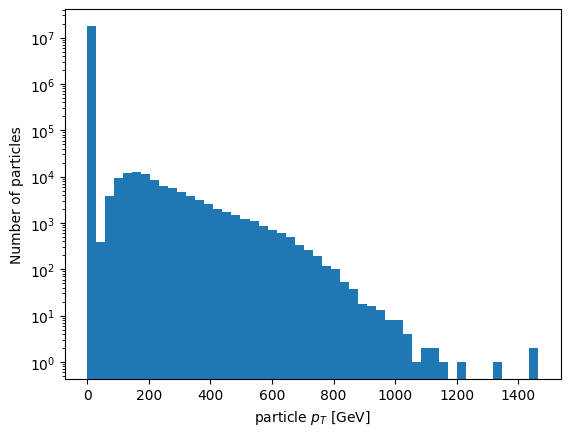

In [30]:
import matplotlib.pyplot as plt

plt.hist(particlePt, bins=50)
plt.gca().set_yscale("log")
yAxis = plt.gca()
plt.xlabel("particle $p_T$ [GeV]")
plt.ylabel("Number of particles")
plt.show()

Creiamo ora un'immagine delle medie dei getti:

In [31]:
jetImage = f.get("jetImage")
jetImageECAL = f.get("jetImageECAL")
jetImageHCAL = f.get("jetImageHCAL")

print(jetImage.shape, jetImageECAL.shape, jetImageHCAL.shape)

(95500, 25, 25) (95500, 25, 25) (95500, 25, 25)


In [32]:
SUM_jetImageE = np.sum(jetImage, axis=0)
print(SUM_jetImageE.shape)

(25, 25)


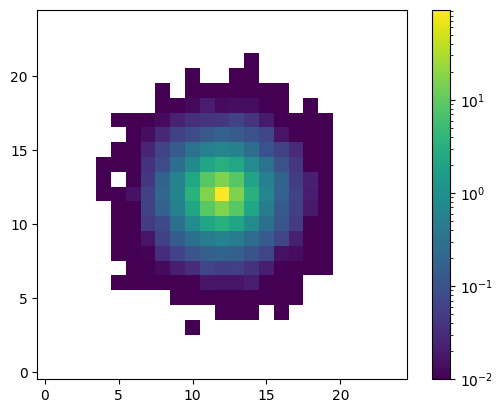

In [33]:
from matplotlib.colors import LogNorm
plt.imshow(SUM_jetImageE/float(jetImage.shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
plt.colorbar()
plt.show()

Facciamo lo stesso per le immagini ECAL and HCAL:

In [34]:
SUM_jetImageECAL = np.sum(jetImageECAL, axis=0)
print(SUM_jetImageECAL.shape)

SUM_jetImageHCAL = np.sum(jetImageHCAL, axis=0)
print(SUM_jetImageHCAL.shape)

(25, 25)
(25, 25)


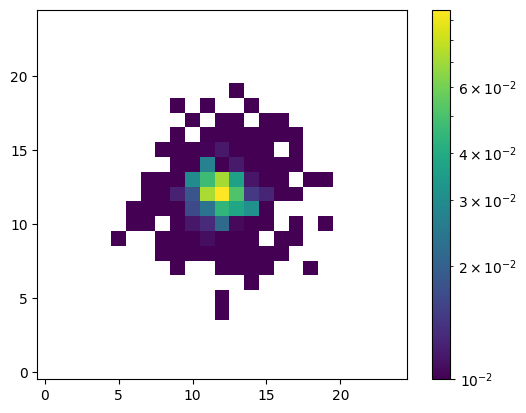

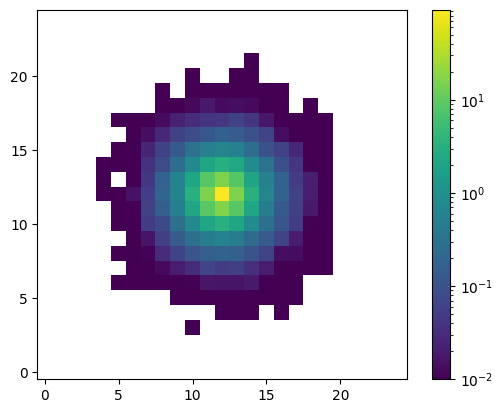

In [35]:
from matplotlib.colors import LogNorm

plt.imshow(SUM_jetImageECAL/float(jetImage.shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
plt.colorbar()
plt.show()

plt.imshow(SUM_jetImageHCAL/float(jetImage.shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
plt.colorbar()
plt.show()

<a id='section9'></a>
## PCA e Isomap

Useremo il set di dati sul cancro al seno è un dato multivariato a valori reali costituito da due classi, in cui ogni classe indica se un paziente ha o meno un cancro al seno. Le due categorie sono: maligne e benigne.

La classe maligna ha 212 campioni, mentre la classe benigna ha 357 campioni.

Ha 30 caratteristiche condivise tra tutte le classi: raggio, trama, perimetro, area, levigatezza, dimensione frattale, ecc.

Puoi scaricare il set di dati sul cancro con l'aiuto della libreria sklearn.

In [36]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

breast = load_breast_cancer()

breast_data = breast.data
breast_labels = breast.target
features = breast.feature_names

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

breast_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign


In [37]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

normalised_breast = pd.DataFrame(x, columns=features)
normalised_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [38]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_df = pd.DataFrame(data=principalComponents_breast,
                                   columns = ['principal component 1', 'principal component 2'])

principal_breast_df

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


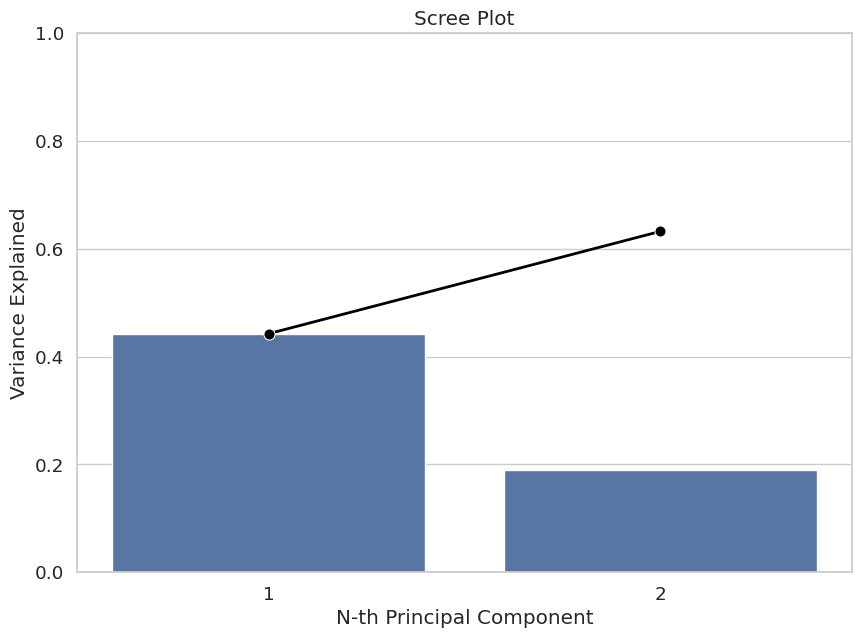

In [39]:
# Scree Plot
import seaborn as sns

PC_components = np.arange(pca_breast.n_components_) + 1

_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca_breast.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca_breast.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

<Figure size 640x480 with 0 Axes>

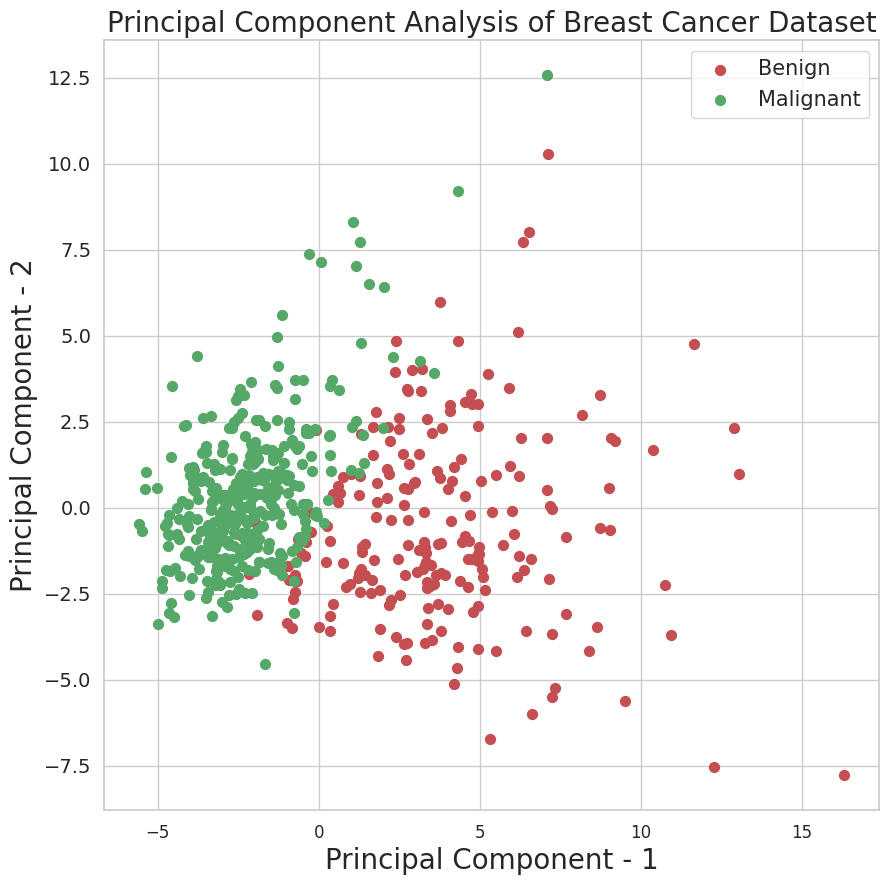

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title('Principal Component Analysis of Breast Cancer Dataset', fontsize=20)

targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1'],
                principal_breast_df.loc[indicesToKeep, 'principal component 2'], 
                c=color, s=50)

plt.legend(targets, prop={'size': 15})

Facciamo ora la stessa cosa usando Isomap:

In [41]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=3, n_components=2)
iso.fit(x)

isomap_breast_df = iso.transform(x)
isomap_breast_df = pd.DataFrame(data=isomap_breast_df,
                                columns = ['component 1', 'component 2'])

isomap_breast_df

,component 1,component 2
0,23.842317,3.945953
1,9.138180,-5.279747
2,17.218025,-2.450004
3,13.383214,14.901732
4,11.190681,-5.134310
...,...,...
564,21.917764,-4.171433
565,11.976356,-5.655518
566,2.813797,-6.132866
567,20.958749,1.163927


<Figure size 640x480 with 0 Axes>

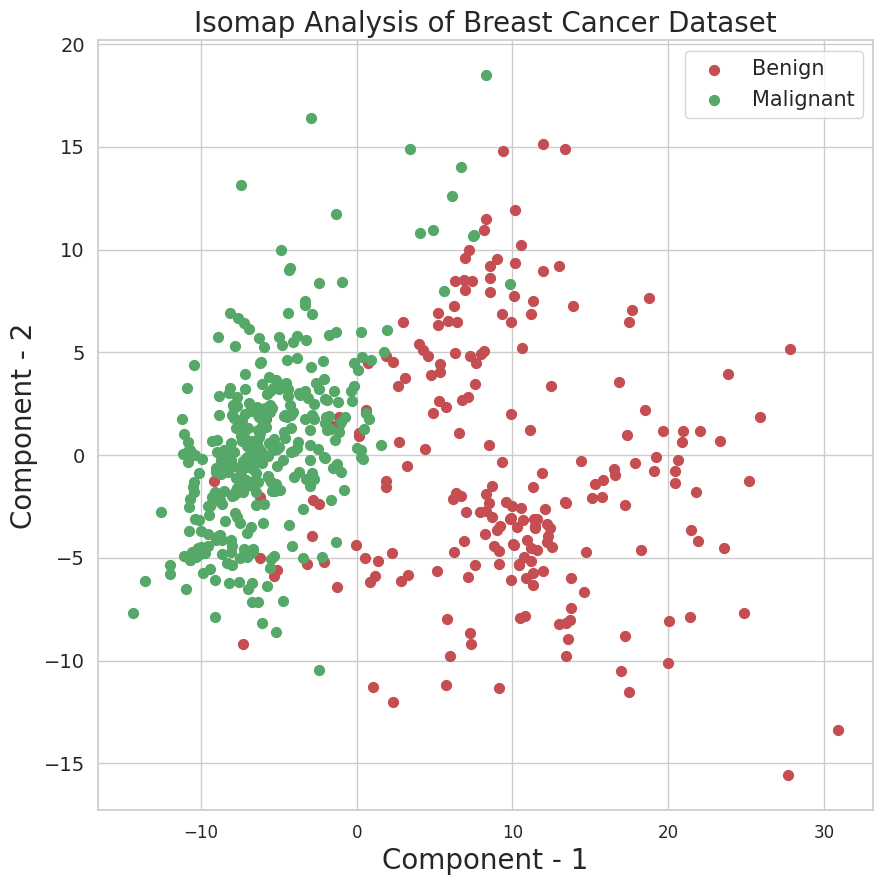

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Component - 1', fontsize=20)
plt.ylabel('Component - 2', fontsize=20)
plt.title('Isomap Analysis of Breast Cancer Dataset', fontsize=20)

targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(isomap_breast_df.loc[indicesToKeep, 'component 1'],
                isomap_breast_df.loc[indicesToKeep, 'component 2'], 
                c=color, s=50)

plt.legend(targets, prop={'size': 15})

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>